In [74]:
%reset

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim import Adam
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

print('Imported libraries')

Imported libraries


In [76]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [77]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 47 * 47, 256)
        self.fc2 = nn.Linear(256, 120)
        self.fc3 = nn.Linear(120, 28)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 47 * 47)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [78]:
state_dict = torch.load('model.pth')
model = ConvNet()
model.load_state_dict(state_dict)
model.eval()

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=35344, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=28, bias=True)
)

In [79]:
# Define transformation to randomly augment image data
transformer = transforms.Compose([
    transforms.Resize([200,200]), # to ensure all images are the same size
    transforms.ToTensor(), # 0-255 to 0-1, numpy to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # 0-1 to [-1,1], formula (x-mean)/std
])

TypeError: Invalid shape (3, 200, 200) for image data

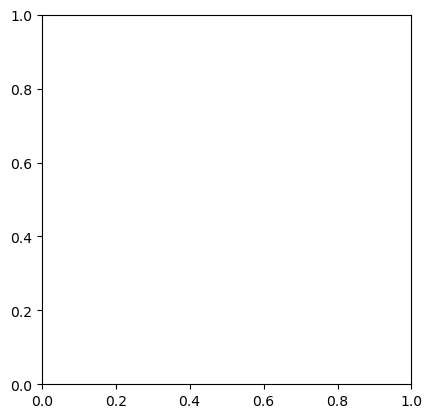

In [85]:
image = Image.open('H.jpg')
image = I
image = transformer(image)
plt.imshow(image)

In [81]:
with torch.no_grad():
    output = model(image)

 # Convert the output into a probability distribution over the classes
probs = torch.nn.functional.softmax(output[0], dim=0)

# Convert the probability distribution to a list
probs_list = probs.tolist()

print(probs_list)

[7.245632913099875e-12, 0.0, 1.8882707897294182e-11, 3.5894767842028204e-23, 1.059644624147619e-29, 1.4842374551626847e-10, 4.958981359229342e-13, 2.6167681065893903e-15, 7.369203468462154e-23, 0.09435275942087173, 0.0, 0.0006204083911143243, 1.4808669578683768e-21, 6.902595162117109e-11, 1.4562725720065417e-23, 0.9049761891365051, 1.2950634697972419e-07, 0.0, 5.50712506959182e-22, 5.436480085552198e-11, 0.0, 0.0, 0.0, 4.412876886885205e-30, 9.355444419156811e-09, 5.048790990258567e-05, 4.001493391859509e-24, 5.167333227973359e-10]


In [82]:
classes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 
           'H', 'I', 'J', 'K', 'L', 'M', 'N', 
           'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 
           'T', 'U', 'V', 'W', 'X', 'Y', 'Z')

for i in range (28):
    print('{}: {:.6f}%'.format(classes[i], probs_list[i] * 100))

A: 0.000000%
B: 0.000000%
C: 0.000000%
D: 0.000000%
E: 0.000000%
F: 0.000000%
G: 0.000000%
H: 0.000000%
I: 0.000000%
J: 9.435276%
K: 0.000000%
L: 0.062041%
M: 0.000000%
N: 0.000000%
nothing: 0.000000%
O: 90.497619%
P: 0.000013%
Q: 0.000000%
R: 0.000000%
S: 0.000000%
space: 0.000000%
T: 0.000000%
U: 0.000000%
V: 0.000000%
W: 0.000001%
X: 0.005049%
Y: 0.000000%
Z: 0.000000%


In [83]:
# _, predicted = torch.max(output.data, 1)
# class_idx = predicted.item()
# print(predicted)
# print(class_idx)